In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
import os
from abc import ABC,abstractmethod
from typing import Dict, Any
from scipy import stats

%matplotlib inline

    IMPORT

In [101]:
data = pd.read_csv(r"HomeC.csv")

In [102]:
data = data[:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

Exploratory Data Analysis


In [103]:
data.describe()

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
count     503910.000000     503910.000000    503910.000000    503910.000000   
mean           0.042137          0.014139         0.002755         0.007023   
std            0.057967          0.014292         0.021860         0.076740   
min            0.000017          0.000017         0.000000         0.000000   
25%            0.007133          0.012733         0.000500         0.000017   
50%            0.008083          0.012933         0.000667         0.000050   
75%            0.053192          0.013100         0.000750         0.000167   
max            1.273933          1.088983         1.166583         2.262583   

       Kitchen 38 [kW]      Barn [kW]      Well [kW]  Microwave [kW]  \
count    503910.000000  503910.000000  503910.000000   503910.000000   
mean          0.000009       0.058530       0.015642        0.010983   
std           0.000010       0.202706       0.137841        0.098859   
min           0.000000       0.000000       0.000000        0.000000   
25%           0.000000       0.029833       0.000983        0.003617   
50%           0.000017       0.031317       0.001000        0.004000   
75%           0.000017       0.032883       0.001017        0.004067   
max           0.000183       7.027900       1.633017        1.929800   

       Living room [kW]     Solar [kW]    temperature       humidity  \
count     503910.000000  503910.000000  503910.000000  503910.000000   
mean           0.035313       0.076229      50.741935       0.664085   
std            0.096056       0.128428      19.113807       0.194389   
min            0.000000       0.000000     -12.640000       0.130000   
25%            0.001483       0.003367      35.770000       0.510000   
50%            0.001617       0.004283      50.320000       0.680000   
75%            0.001750       0.083917      66.260000       0.840000   
max            0.465217       0.613883      93.720000       0.980000   

          visibility  apparentTemperature       pressure      windSpeed  \
count  503910.000000        503910.000000  503910.000000  503910.000000   
mean        9.253444            48.263382    1016.301625       6.649936   
std         1.611186            22.027916       7.895185       3.982716   
min         0.270000           -32.080000     986.400000       0.000000   
25%         9.420000            31.090000    1011.290000       3.660000   
50%        10.000000            50.320000    1016.530000       5.930000   
75%        10.000000            66.260000    1021.480000       8.940000   
max        10.000000           101.120000    1042.

In [104]:
data.head(2)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633      0.12415   
1        0.020717        0.063817          0.444067      0.12400   

   Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
0          0.006983          0.013083         0.000417          0.00015   
1          0.006983          0.013117         0.000417          0.00015   

   Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
0              0.0    0.03135   0.001017        0.004067          0.001517   
1              0.0    0.03150   0.001017        0.004067          0.001650   

   Solar [kW]  temperature         icon  humidity  visibility summary  \
0    0.003483        36.14  clear-night      0.62        10.0   Clear   
1    0.003467        36.14  clear-night      0.62        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0

In [105]:
print(data.describe())
data_numeric = data.select_dtypes(include=['float64', 'int64'])

            use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.0000

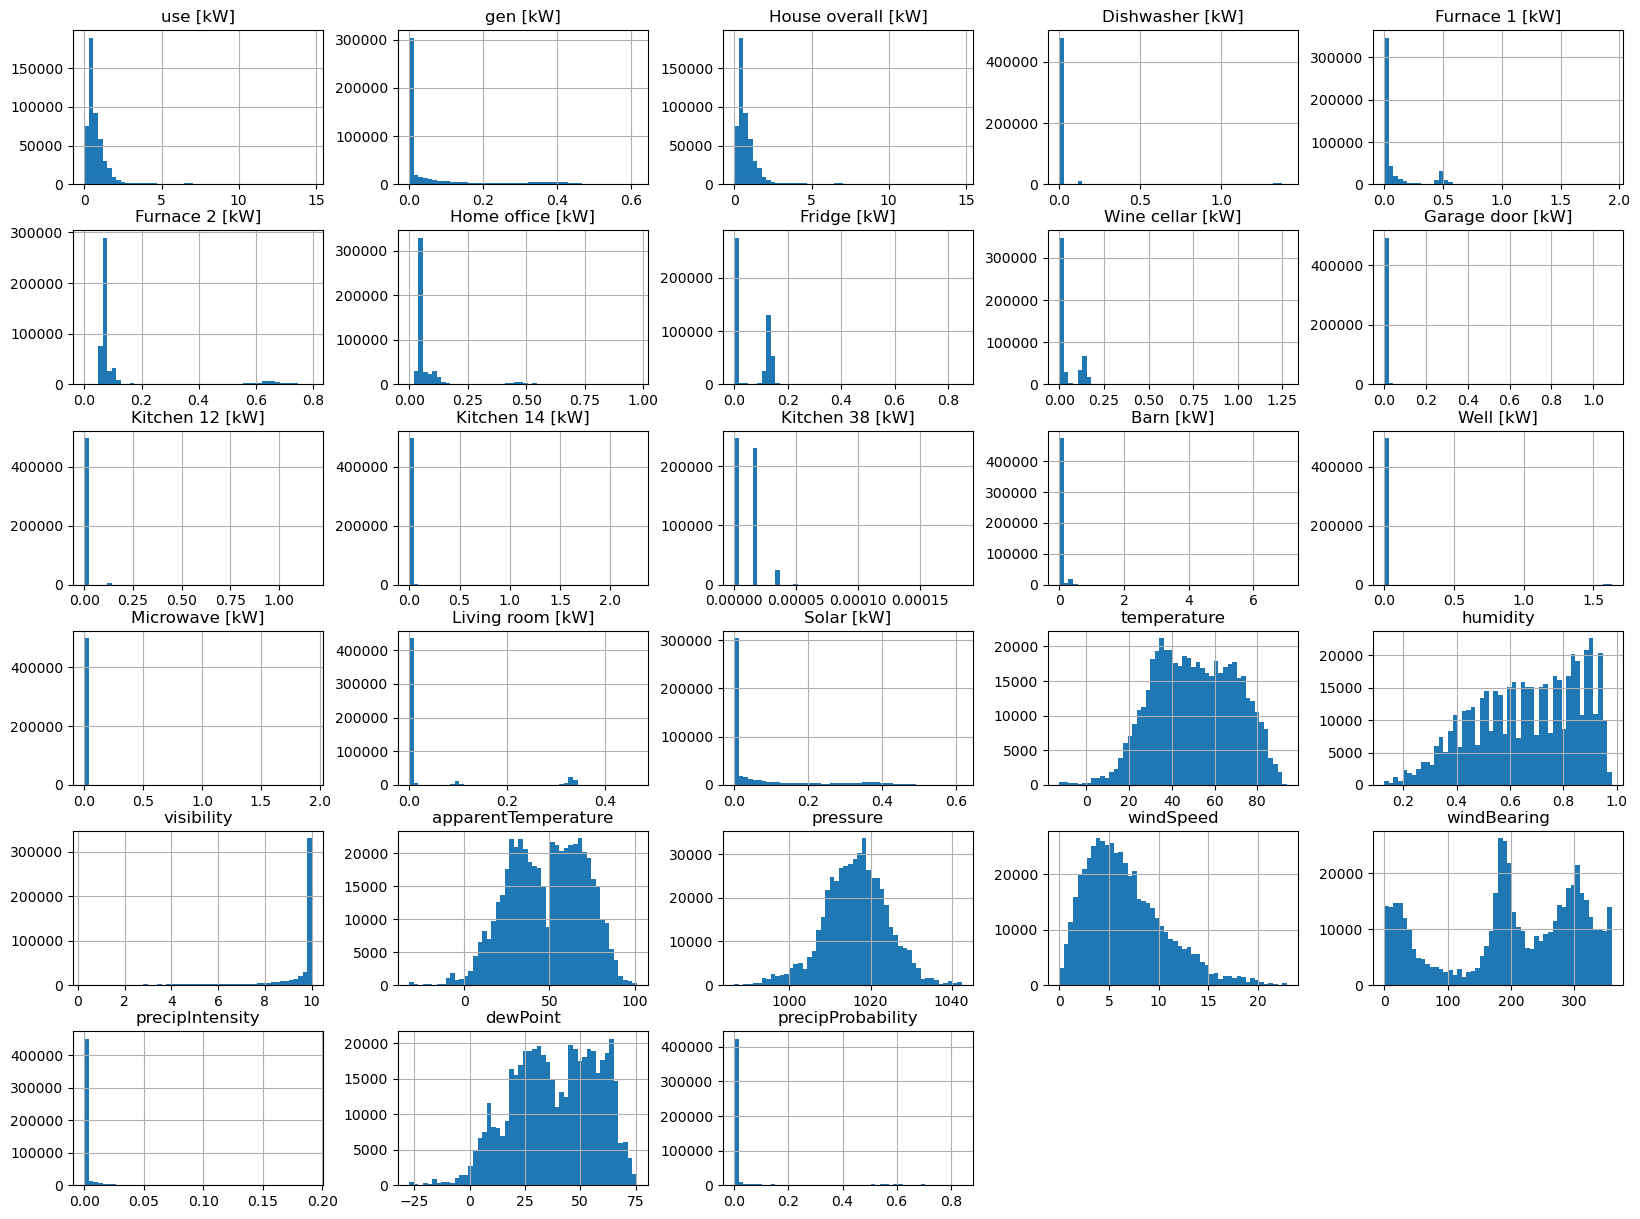

In [106]:
data.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [107]:
data.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [108]:
data['time'] = pd.to_datetime(data['time'], unit='s', errors='coerce')
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min'))
data = data.set_index('time')
data.head(2)


use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
time                                                                           
2016-01-01 05:00:00  0.932833  0.003483            0.932833         0.000033   
2016-01-01 05:01:00  0.934333  0.003467            0.934333         0.000000   

                     Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
time                                                                    
2016-01-01 05:00:00        0.020700        0.061917          0.442633   
2016-01-01 05:01:00        0.020717        0.063817          0.444067   

                     Fridge [kW]  Wine cellar [kW]  Garage door [kW]  \
time                                                                   
2016-01-01 05:00:00      0.12415          0.006983          0.013083   
2016-01-01 05:01:00      0.12400          0.006983          0.013117   

                     Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  \
time                                                                     
2016-01-01 05:00:00         0.000417          0.00015              0.0   
2016-01-01 05:01:00         0.000417          0.00015              0.0   

                     Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
time                                                                          
2016-01-01 05:00:00    0.03135   0.001017        0.004067          0.001517   
2016-01-01 05:01:00    0.03150   0.001017        0.004067          0.001650   

                     Solar [kW]  temperature         icon  humidity  \
time                                                                  
2016-01-01 05:00:00    0.003483        36.14  clear-night      0.62   
2016-01-01 05:01:00    0.003467        36.14  clear-night      0.62   

                     visibility summary  apparentTemperature  pressure  \
time                                                                     
2016-01-01 05:00:00        10.0   Clear                29.26   1016.91   
2016-01-01 05:01:00        10.0   Clear                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18  cloudCover        282.0              0.0   
2016-01-01 05:01:00       9.18  cloudCover        282.0              0.0   

                     dewPoint  precipProbability  
time                                              
2016-01-01 05:00:00      24.4                0.0  
2016-01-01 05:01:00      24.4                0.0

In [109]:
data['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [110]:
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [111]:
data.columns = [i.replace(' [kW]', '') for i in data.columns]
data['Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1) #We could also use the mean 
data.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)


data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

data = data[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn',
             'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility', 
             'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 
             'dewPoint', 'precipProbability']]
data.head(5)

use       gen  House overall  Dishwasher  \
time                                                                 
2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   
2016-01-01 05:03:00  1.022050  0.003483       1.022050    0.000017   
2016-01-01 05:04:00  1.139400  0.003467       1.139400    0.000133   

                     Home office    Fridge  Wine cellar  Garage door  \
time                                                                   
2016-01-01 05:00:00     0.442633  0.124150     0.006983     0.013083   
2016-01-01 05:01:00     0.444067  0.124000     0.006983     0.013117   
2016-01-01 05:02:00     0.446067  0.123533     0.006983     0.013083   
2016-01-01 05:03:00     0.446583  0.123133     0.006983     0.013000   
2016-01-01 05:04:00     0.446533  0.122850     0.006850     0.012783   

                         Barn      Well  Microwave  Living room   Furnace  \
time                                                                        
2016-01-01 05:00:00  0.031350  0.001017   0.004067     0.001517  0.082617   
2016-01-01 05:01:00  0.031500  0.001017   0.004067     0.001650  0.084533   
2016-01-01 05:02:00  0.031517  0.001000   0.004067     0.001650  0.083017   
2016-01-01 05:03:00  0.031500  0.001017   0.004067     0.001617  0.175417   
2016-01-01 05:04:00  0.031500  0.001017   0.004067     0.001583  0.300917   

                      Kitchen     Solar  temperature  humidity  visibility  \
time                                                                         
2016-01-01 05:00:00  0.000567  0.003483        36.14      0.62        10.0   
2016-01-01 05:01:00  0.000567  0.003467        36.14      0.62        10.0   
2016-01-01 05:02:00  0.000617  0.003467        36.14      0.62        10.0   
2016-01-01 05:03:00  0.000650  0.003483        36.14      0.62        10.0   
2016-01-01 05:04:00  0.000783  0.003467        36.14      0.62        10.0   

                     apparentTemperature  pressure  windSpeed  cloudCover  \
time                                                                        
2016-01-01 05:00:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:01:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:02:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:03:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:04:00                29.26   1016.91       9.18        0.75   

                     windBearing  precipIntensity  dewPoint  precipProbability  
time                                                                            
2016-01-01 05:00:00        282.0              0.0      24.4                0.0  
2016-01-01 05:01:00        282.0              0.0      24.4                0.0  
2016-01-01 05:02:00        282.0              0.0      24.4                0.0  
2016-01-01 05:03:00        282.0              0.0      24.4                0.0  
2016-01-01 05:04:00        282.0              0.0      24.4                0.0

Energy Correlation

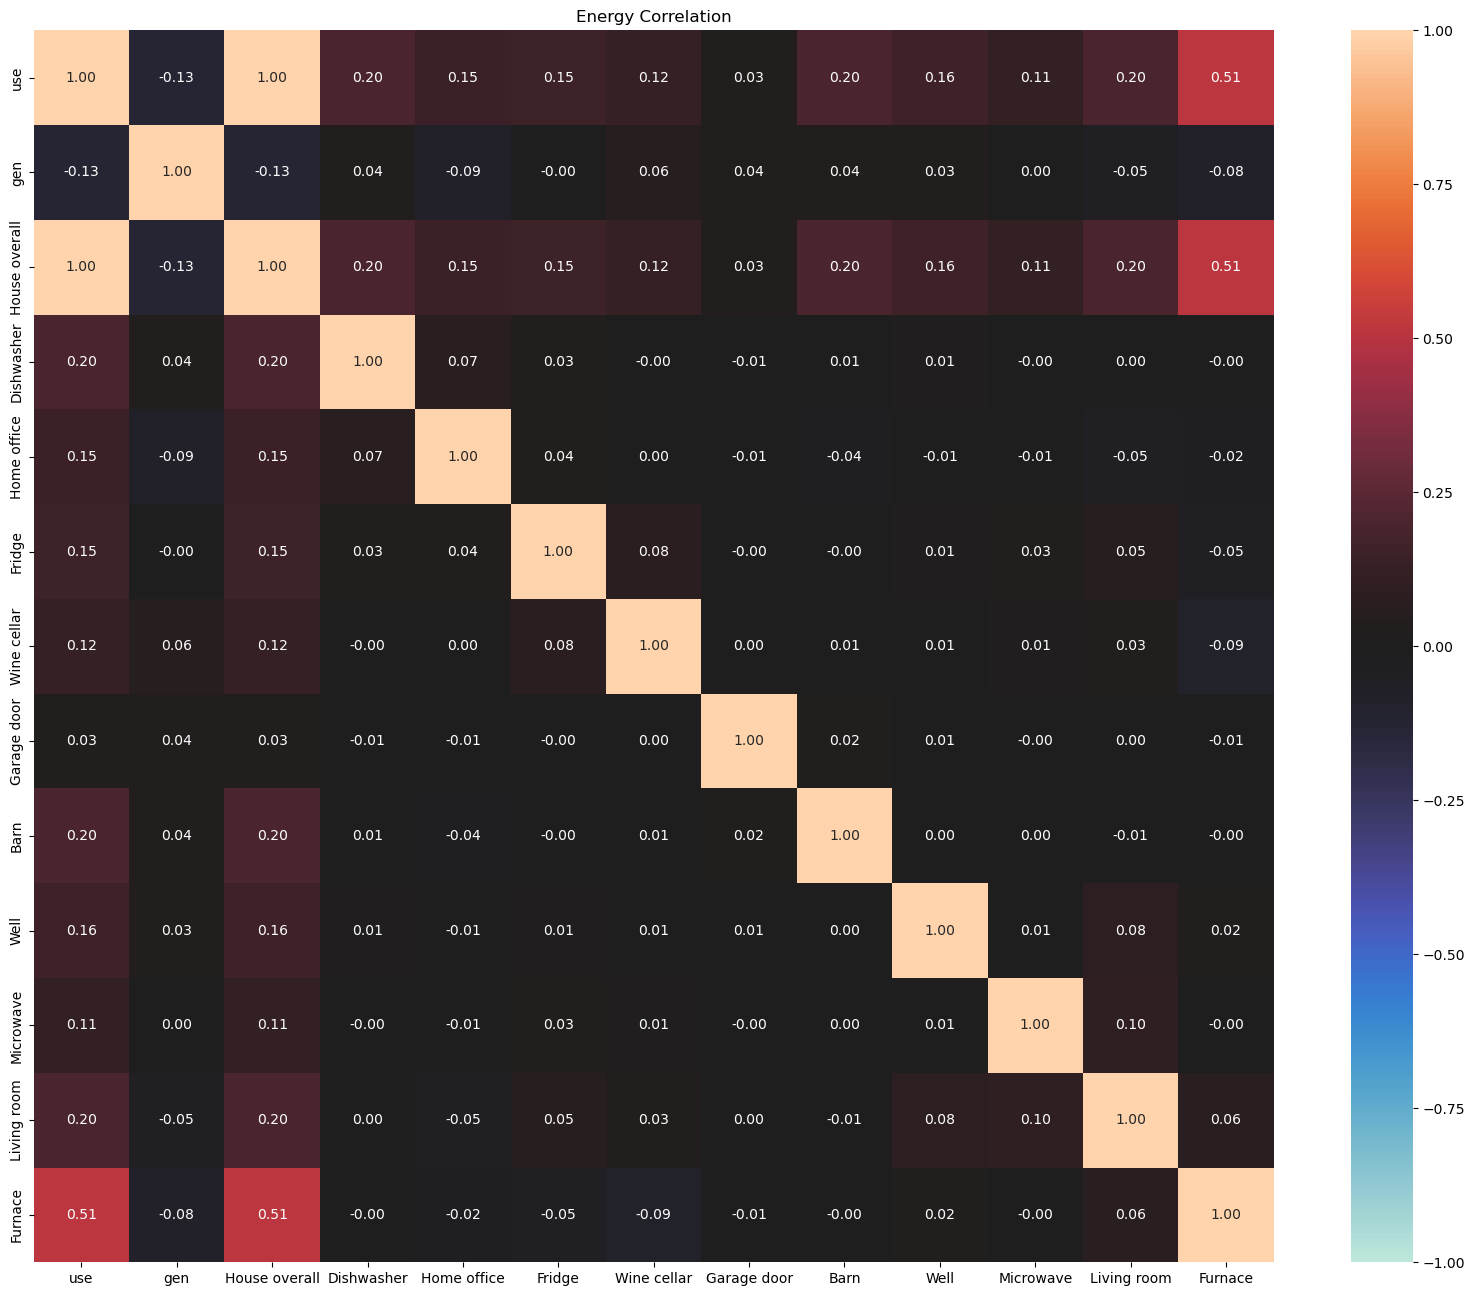

In [112]:
numeric_data = data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr() 
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(data[data.columns[0:13].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)  
plt.title('Energy Correlation', fontsize=12)  
plt.show()

In [113]:
print(data['gen'].equals(data['Solar']))
print(data['use'].equals(data['House overall']))

True
True


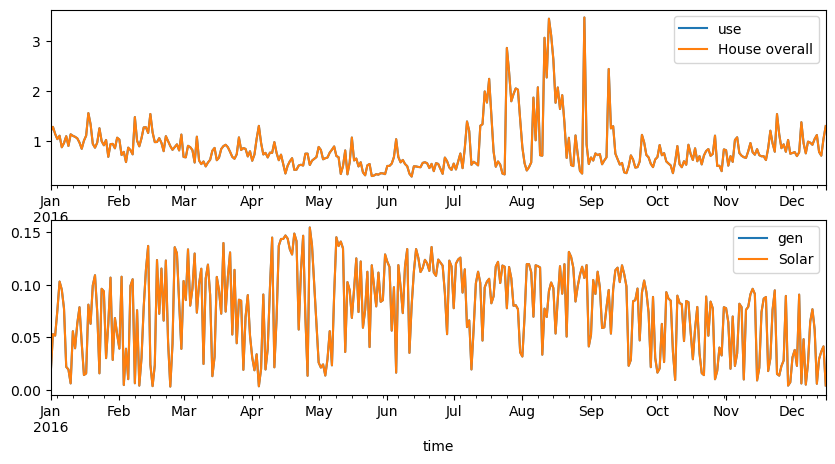

In [114]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['use','House overall']].resample('D').mean().plot(ax=axes[0])
data[['gen','Solar']].resample('D').mean().plot(ax=axes[1]);


In [115]:
print(data.columns)


Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability'],
      dtype='object')


In [116]:
data.drop(['use', 'gen'], axis=1, inplace=True)


Weather Correlation

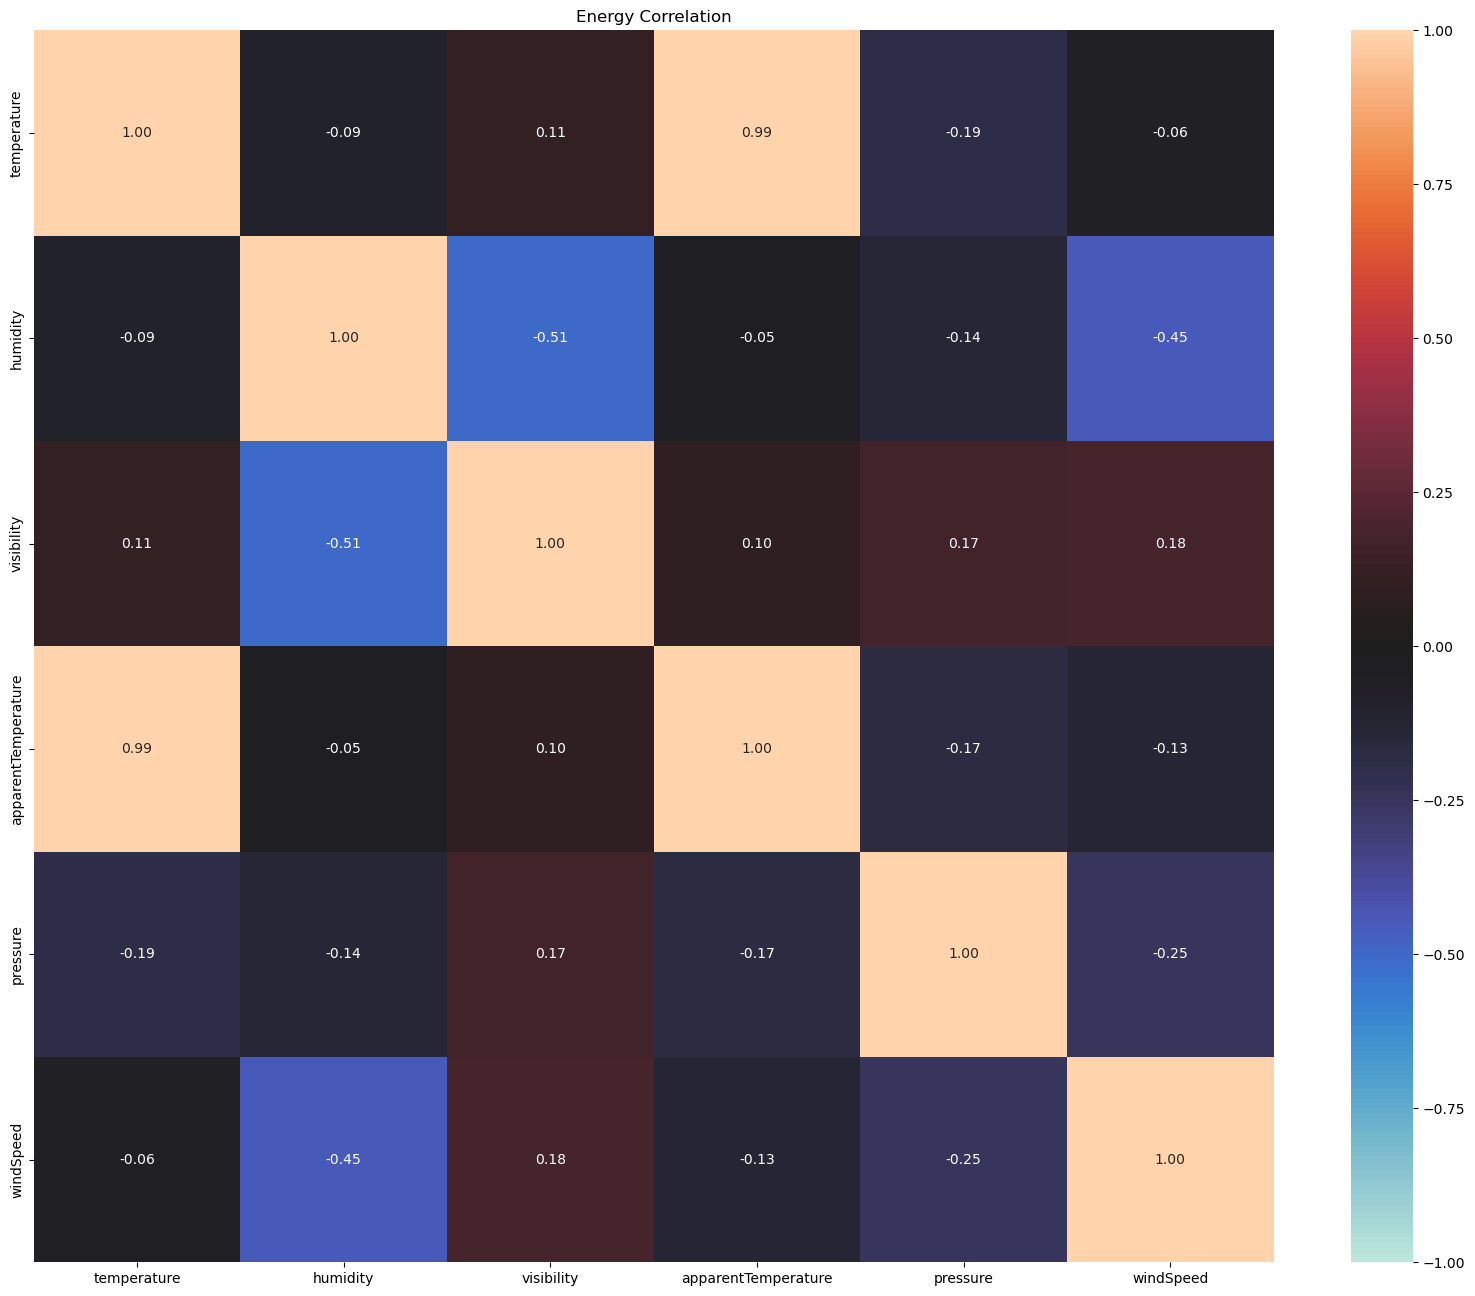

In [117]:
numeric_data = data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr() 
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(data[data.columns[13:-5].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)  
plt.title('Energy Correlation', fontsize=12)  
plt.show()

<Axes: xlabel='time'>

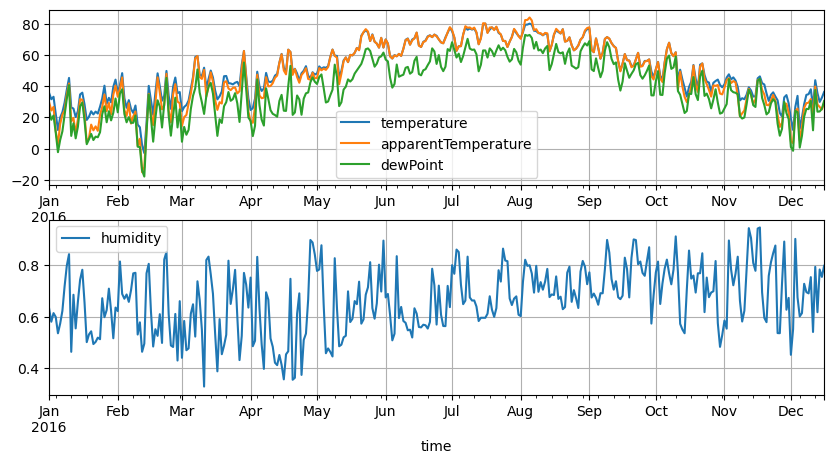

In [118]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

Temperature difference

In [119]:
data['Tdiff'] = (data['apparentTemperature']-data['temperature'])
clima = data.columns[13:-1].tolist()
lista_corr = []
for i in clima:
  cor = data[i].corr(data['Tdiff'])
  lista_corr.append(cor)
data_corr = pd.DataFrame(list(zip(clima, lista_corr)), columns=['weather','Tdiff_corr']).set_index('weather')
data_corr

Tdiff_corr
weather                        
temperature            0.732693
humidity               0.188441
visibility            -0.018984
apparentTemperature    0.807018
pressure              -0.029497
windSpeed             -0.465971
cloudCover            -0.013172
windBearing           -0.180131
precipIntensity        0.055953
dewPoint               0.753312
precipProbability      0.068525

<Axes: xlabel='time'>

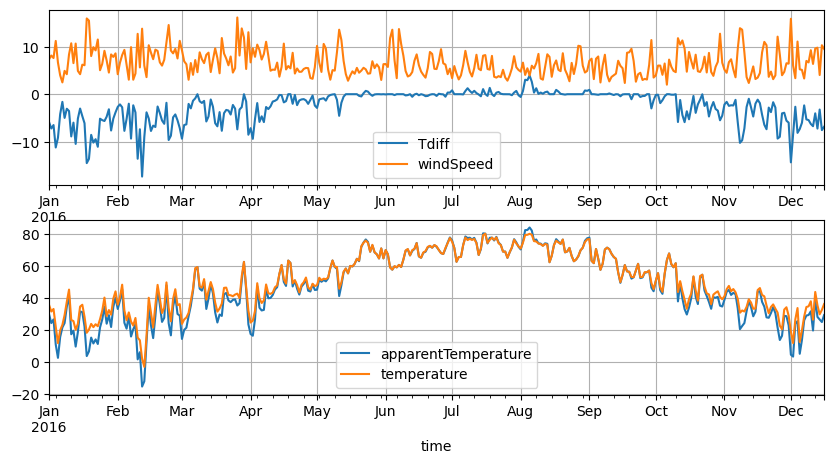

In [120]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['Tdiff','windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)

In [121]:
data.drop('Tdiff', axis=1, inplace=True)

Visualizations

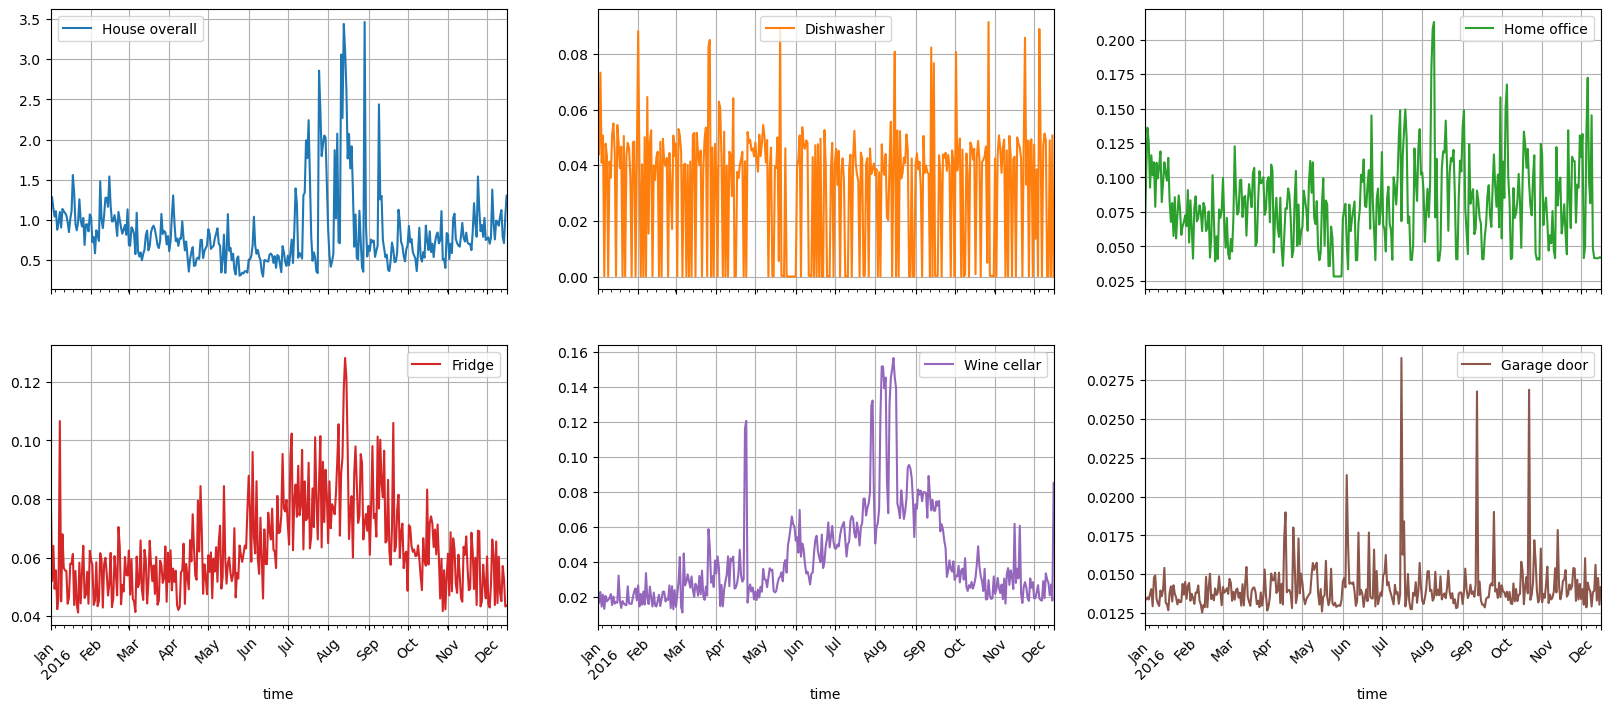

In [122]:
data[data.columns[0:6].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 8),
                                                                grid=True, rot=45);

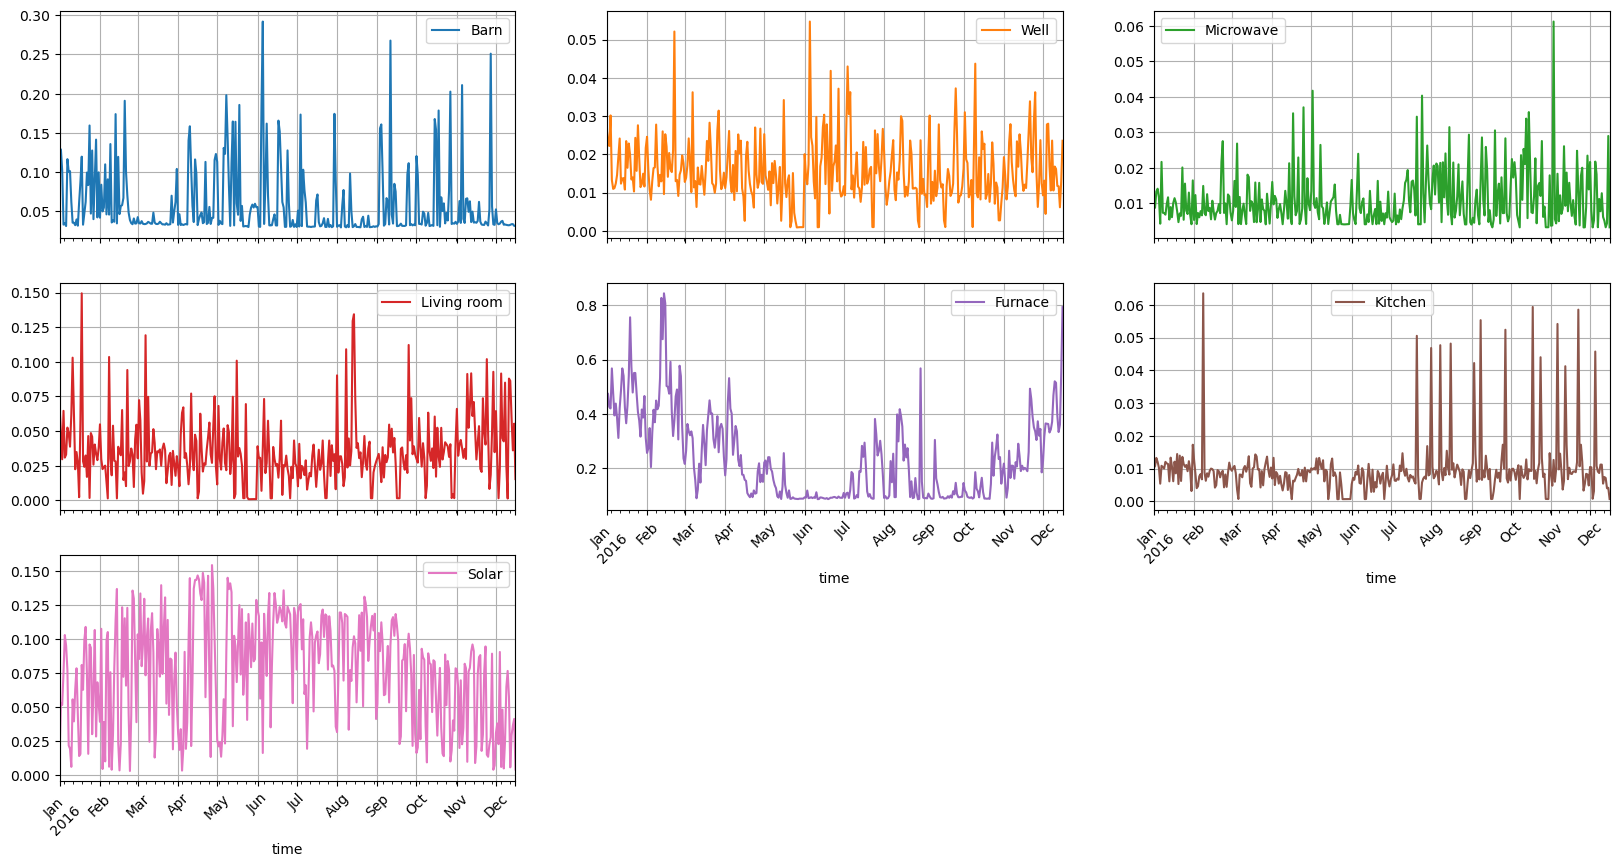

In [123]:
data[data.columns[6:13].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                                grid=True, rot=45, xlabel=None);


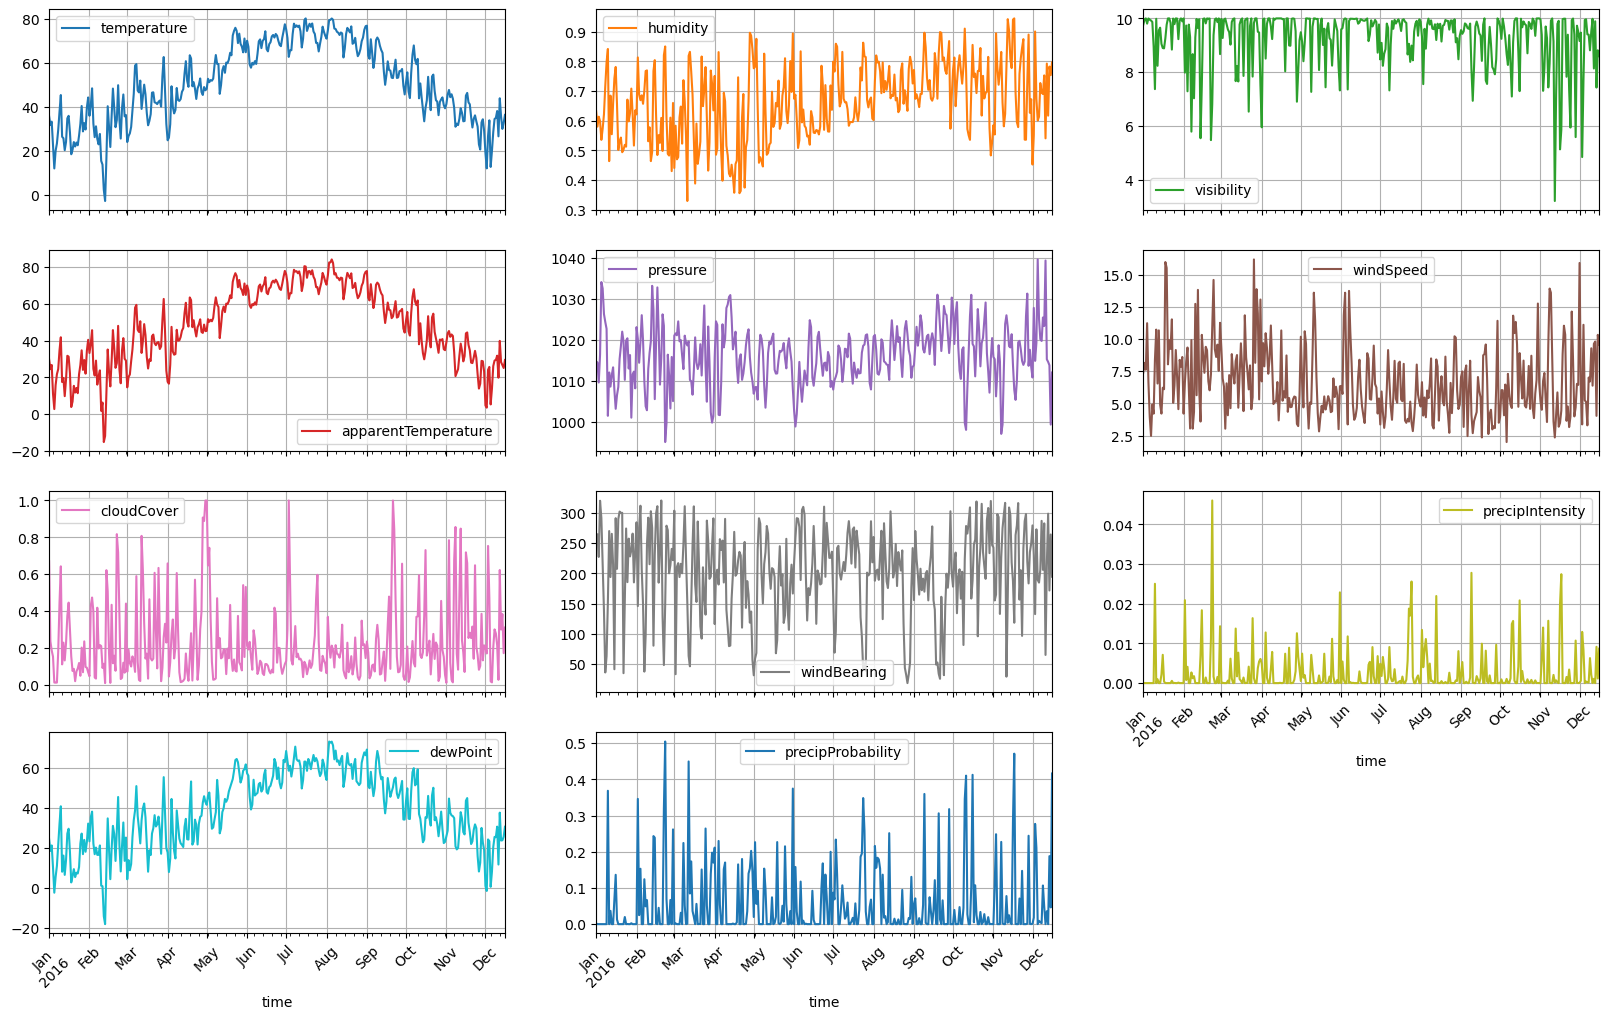

In [124]:
data[data.columns[13:].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 12),
                                                                grid=True, rot=45, xlabel=None);

Groupings

In [125]:
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data.head(5)

House overall  Dishwasher  Home office    Fridge  \
time                                                                    
2016-01-01 05:00:00       0.932833    0.000033     0.442633  0.124150   
2016-01-01 05:01:00       0.934333    0.000000     0.444067  0.124000   
2016-01-01 05:02:00       0.931817    0.000017     0.446067  0.123533   
2016-01-01 05:03:00       1.022050    0.000017     0.446583  0.123133   
2016-01-01 05:04:00       1.139400    0.000133     0.446533  0.122850   

                     Wine cellar  Garage door      Barn      Well  Microwave  \
time                                                                           
2016-01-01 05:00:00     0.006983     0.013083  0.031350  0.001017   0.004067   
2016-01-01 05:01:00     0.006983     0.013117  0.031500  0.001017   0.004067   
2016-01-01 05:02:00     0.006983     0.013083  0.031517  0.001000   0.004067   
2016-01-01 05:03:00     0.006983     0.013000  0.031500  0.001017   0.004067   
2016-01-01 05:04:00     0.006850     0.012783  0.031500  0.001017   0.004067   

                     Living room   Furnace   Kitchen     Solar  temperature  \
time                                                                          
2016-01-01 05:00:00     0.001517  0.082617  0.000567  0.003483        36.14   
2016-01-01 05:01:00     0.001650  0.084533  0.000567  0.003467        36.14   
2016-01-01 05:02:00     0.001650  0.083017  0.000617  0.003467        36.14   
2016-01-01 05:03:00     0.001617  0.175417  0.000650  0.003483        36.14   
2016-01-01 05:04:00     0.001583  0.300917  0.000783  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time                                                                       
2016-01-01 05:00:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:01:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:02:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:03:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:04:00      0.62        10.0                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18        0.75        282.0              0.0   
2016-01-01 05:01:00       9.18        0.75        282.0              0.0   
2016-01-01 05:02:00       9.18        0.75        282.0              0.0   
2016-01-01 05:03:00       9.18        0.75        282.0              0.0   
2016-01-01 05:04:00       9.18        0.75        282.0              0.0   

                     dewPoint  precipProbability  month  day weekday  hour  \
time                                                                         
2016-01-01 05:00:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:01:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:02:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:03:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:04:00      24.4                0.0      1    1  Friday     5   

                     minute  
time                         
2016-01-01 05:00:00       0  
2016-01-01 05:01:00       1  
2016-01-01 05:02:00       2  
2016-01-01 05:03:00       3  
2016-01-01 05:04:00       4

Month

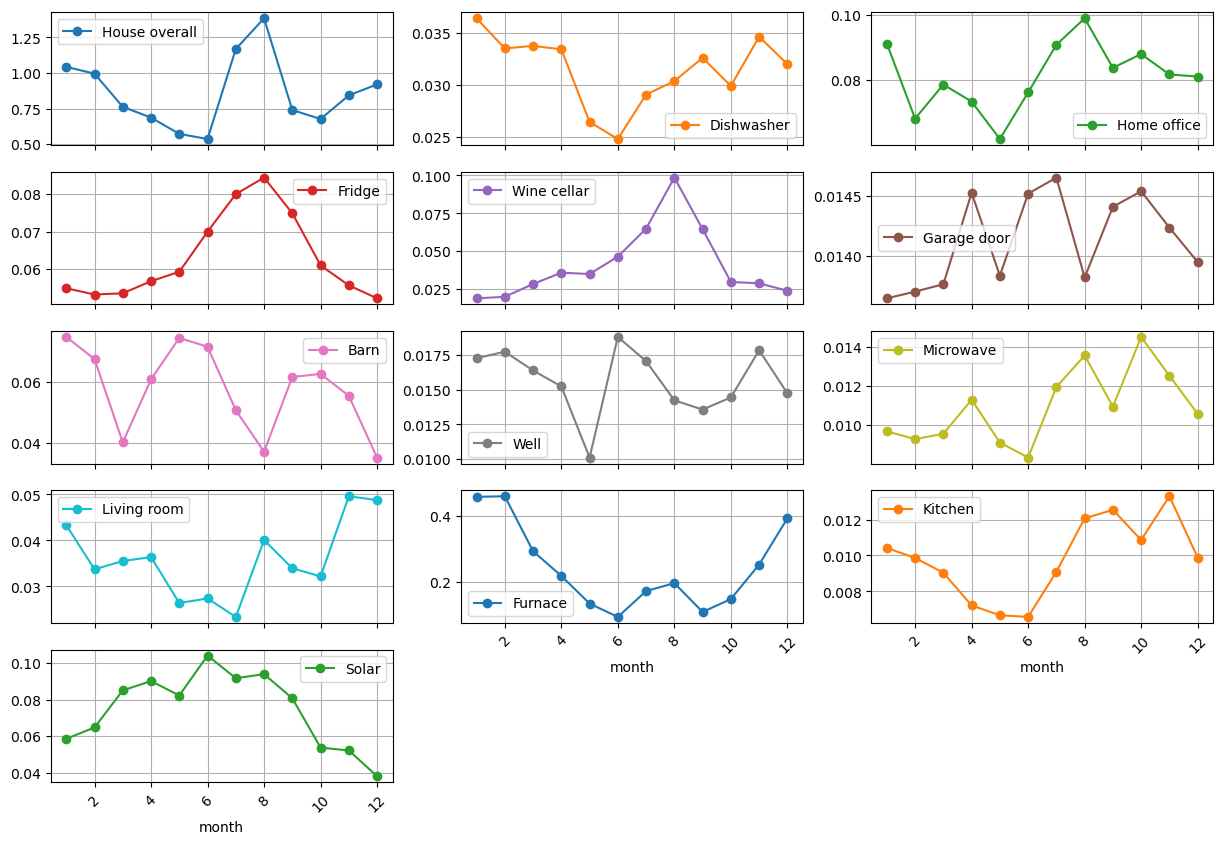

In [126]:
mean_month = data.groupby('month').agg({i:'mean' for i in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Weekday

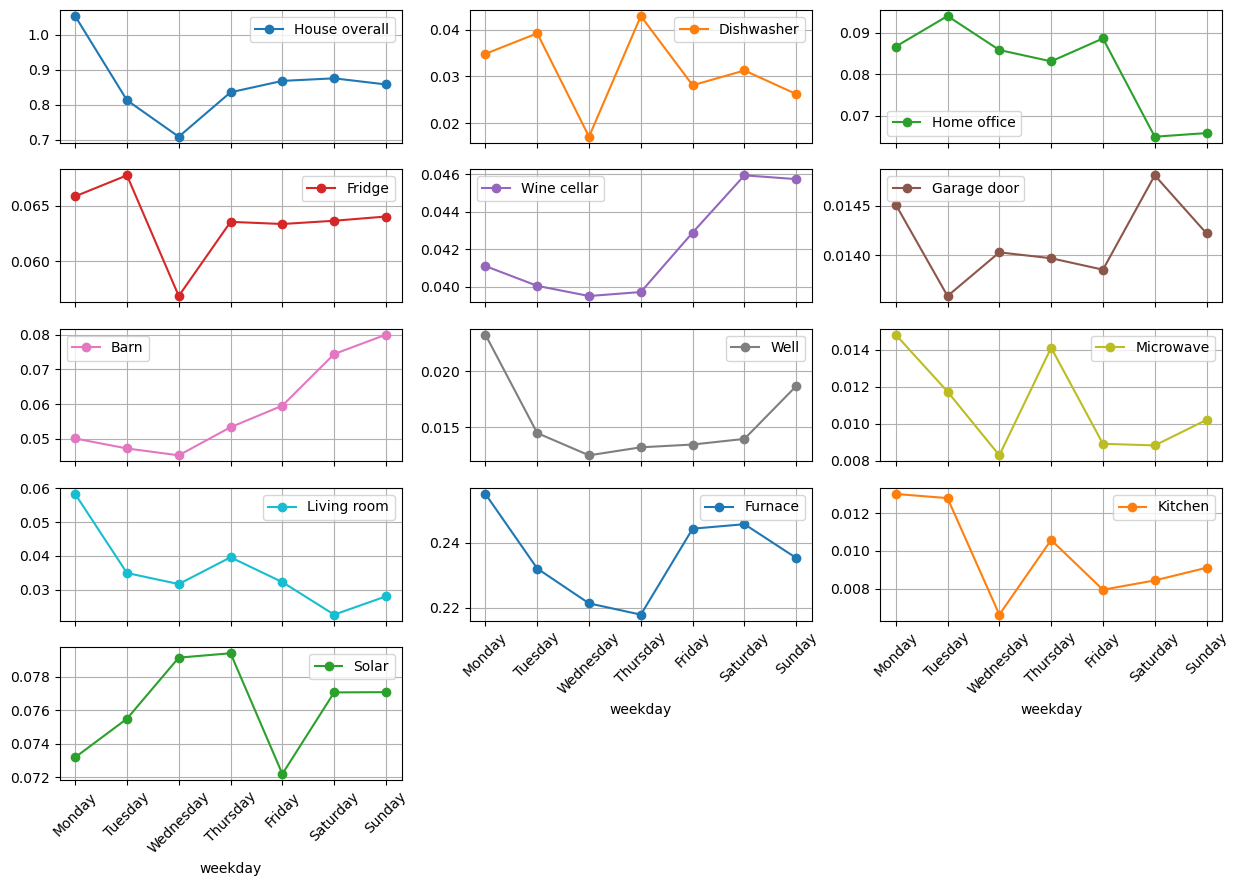

In [127]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = data.groupby('weekday').agg({i:'mean' for i in data.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Hour

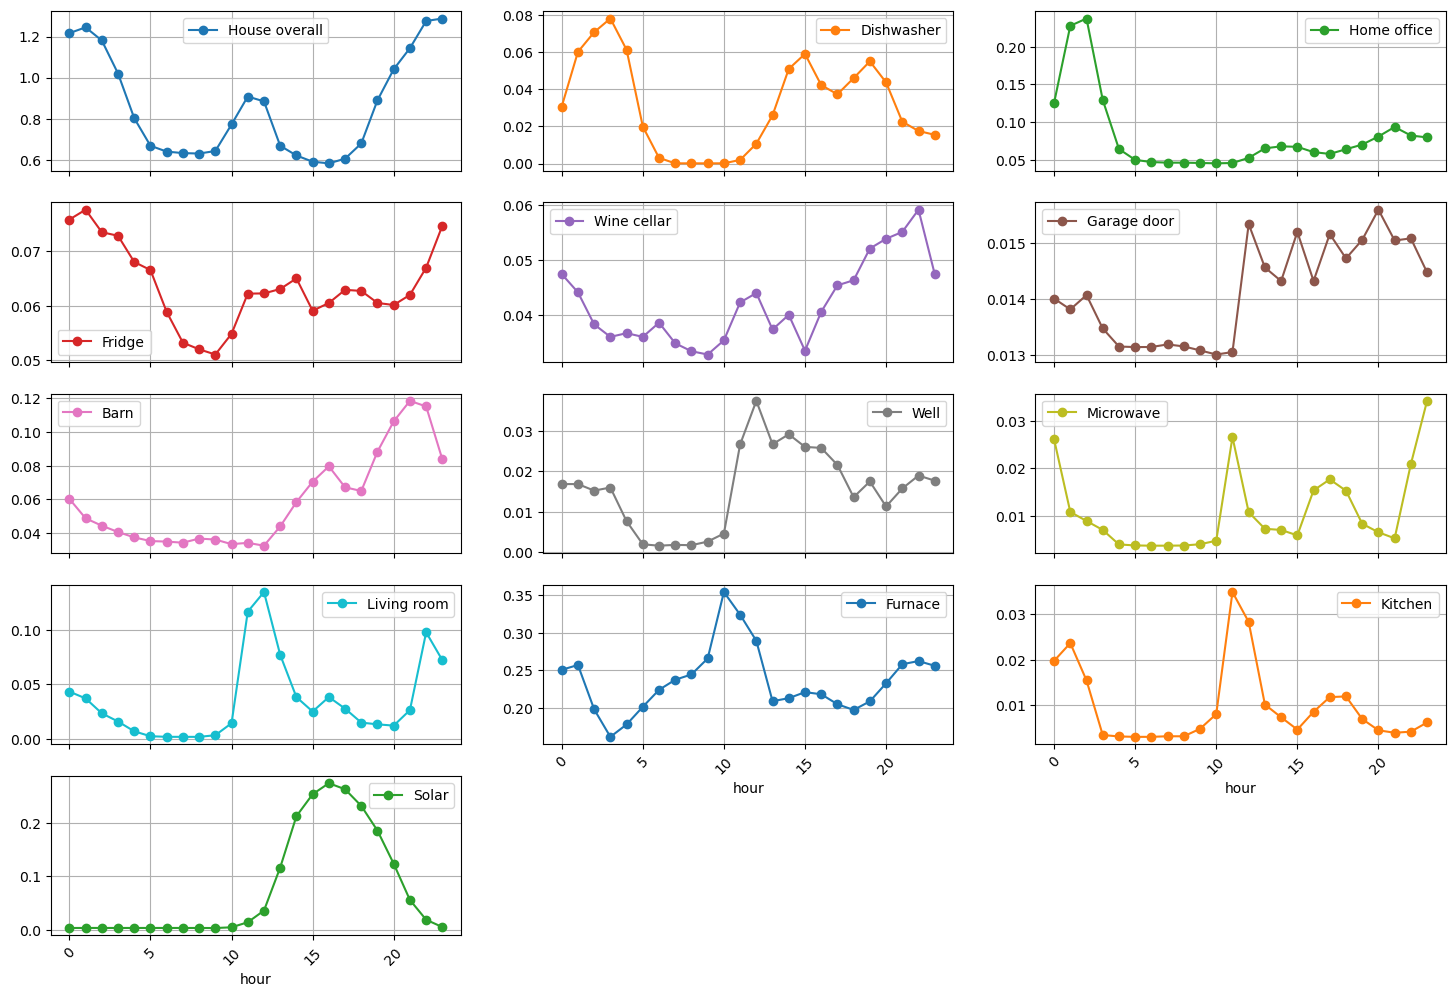

In [128]:
mean_hour = data.groupby('hour').agg({i:'mean' for i in data.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Energy-Weather Correlations

In [129]:
consumtions = data.columns[0:13].tolist()
weather = data.columns[13:-5].tolist()
lists = [consumtions,]
for j in weather:
    correlations = []
    for i in consumtions:
        cor = data[i].corr(data[j])
        correlations.append(cor)
    lists.append(correlations)

names=['consumtions']
for i in weather:
    names.append(i+'_corr')
dataframe_corr = pd.DataFrame(np.column_stack(lists), columns=names).set_index('consumtions')

for i in dataframe_corr.columns[:].tolist():
    dataframe_corr[i] = dataframe_corr[i].apply(float)

In [130]:
dataframe_corr.style.applymap(lambda x: "background-color: red" if x > 0.1 else "background-color: orange" if x < -0.1 else "background-color: white")

More feature exploration

In [131]:
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)
data['Usage_diff'] = data['House overall'] - data['Sum_usage']
data.head(5)

House overall  Dishwasher  Home office    Fridge  \
time                                                                    
2016-01-01 05:00:00       0.932833    0.000033     0.442633  0.124150   
2016-01-01 05:01:00       0.934333    0.000000     0.444067  0.124000   
2016-01-01 05:02:00       0.931817    0.000017     0.446067  0.123533   
2016-01-01 05:03:00       1.022050    0.000017     0.446583  0.123133   
2016-01-01 05:04:00       1.139400    0.000133     0.446533  0.122850   

                     Wine cellar  Garage door      Barn      Well  Microwave  \
time                                                                           
2016-01-01 05:00:00     0.006983     0.013083  0.031350  0.001017   0.004067   
2016-01-01 05:01:00     0.006983     0.013117  0.031500  0.001017   0.004067   
2016-01-01 05:02:00     0.006983     0.013083  0.031517  0.001000   0.004067   
2016-01-01 05:03:00     0.006983     0.013000  0.031500  0.001017   0.004067   
2016-01-01 05:04:00     0.006850     0.012783  0.031500  0.001017   0.004067   

                     Living room   Furnace   Kitchen     Solar  temperature  \
time                                                                          
2016-01-01 05:00:00     0.001517  0.082617  0.000567  0.003483        36.14   
2016-01-01 05:01:00     0.001650  0.084533  0.000567  0.003467        36.14   
2016-01-01 05:02:00     0.001650  0.083017  0.000617  0.003467        36.14   
2016-01-01 05:03:00     0.001617  0.175417  0.000650  0.003483        36.14   
2016-01-01 05:04:00     0.001583  0.300917  0.000783  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time                                                                       
2016-01-01 05:00:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:01:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:02:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:03:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:04:00      0.62        10.0                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18        0.75        282.0              0.0   
2016-01-01 05:01:00       9.18        0.75        282.0              0.0   
2016-01-01 05:02:00       9.18        0.75        282.0              0.0   
2016-01-01 05:03:00       9.18        0.75        282.0              0.0   
2016-01-01 05:04:00       9.18        0.75        282.0              0.0   

                     dewPoint  precipProbability  month  day weekday  hour  \
time                                                                         
2016-01-01 05:00:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:01:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:02:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:03:00      24.4                0.0      1    1  Friday     5   
2016-01-01 05:04:00      24.4                0.0      1    1  Friday     5   

                     minute  Sum_usage  Usage_diff  
time                                                
2016-01-01 05:00:00       0   0.708017    0.224817  
2016-01-01 05:01:00       1   0.711500    0.222833  
2016-01-01 05:02:00       2   0.711550    0.220267  
2016-01-01 05:03:00       3   0.803983    0.218067  
2016-01-01 05:04:00       4   0.929017    0.210383

<Axes: xlabel='time'>

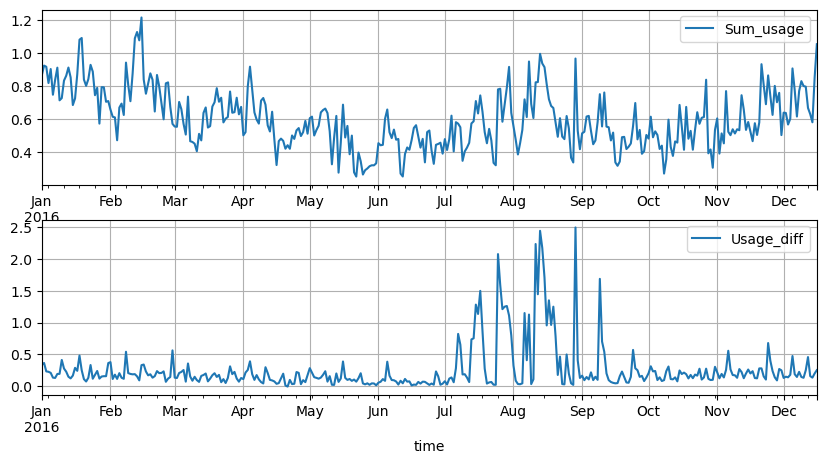

In [132]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data['Sum_usage'].resample('D').mean().plot(ax=axes[0], grid=True, legend=True)
data['Usage_diff'].resample('D').mean().plot(ax=axes[1], grid=True, legend=True)

In [133]:
data.isnull().sum()

House overall          0
Dishwasher             0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Barn                   0
Well                   0
Microwave              0
Living room            0
Furnace                0
Kitchen                0
Solar                  0
temperature            0
humidity               0
visibility             0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
month                  0
day                    0
weekday                0
hour                   0
minute                 0
Sum_usage              0
Usage_diff             0
dtype: int64

In [134]:

data_numeric = data.select_dtypes(include=['float64', 'int64'])

Korelasi antar Fitur

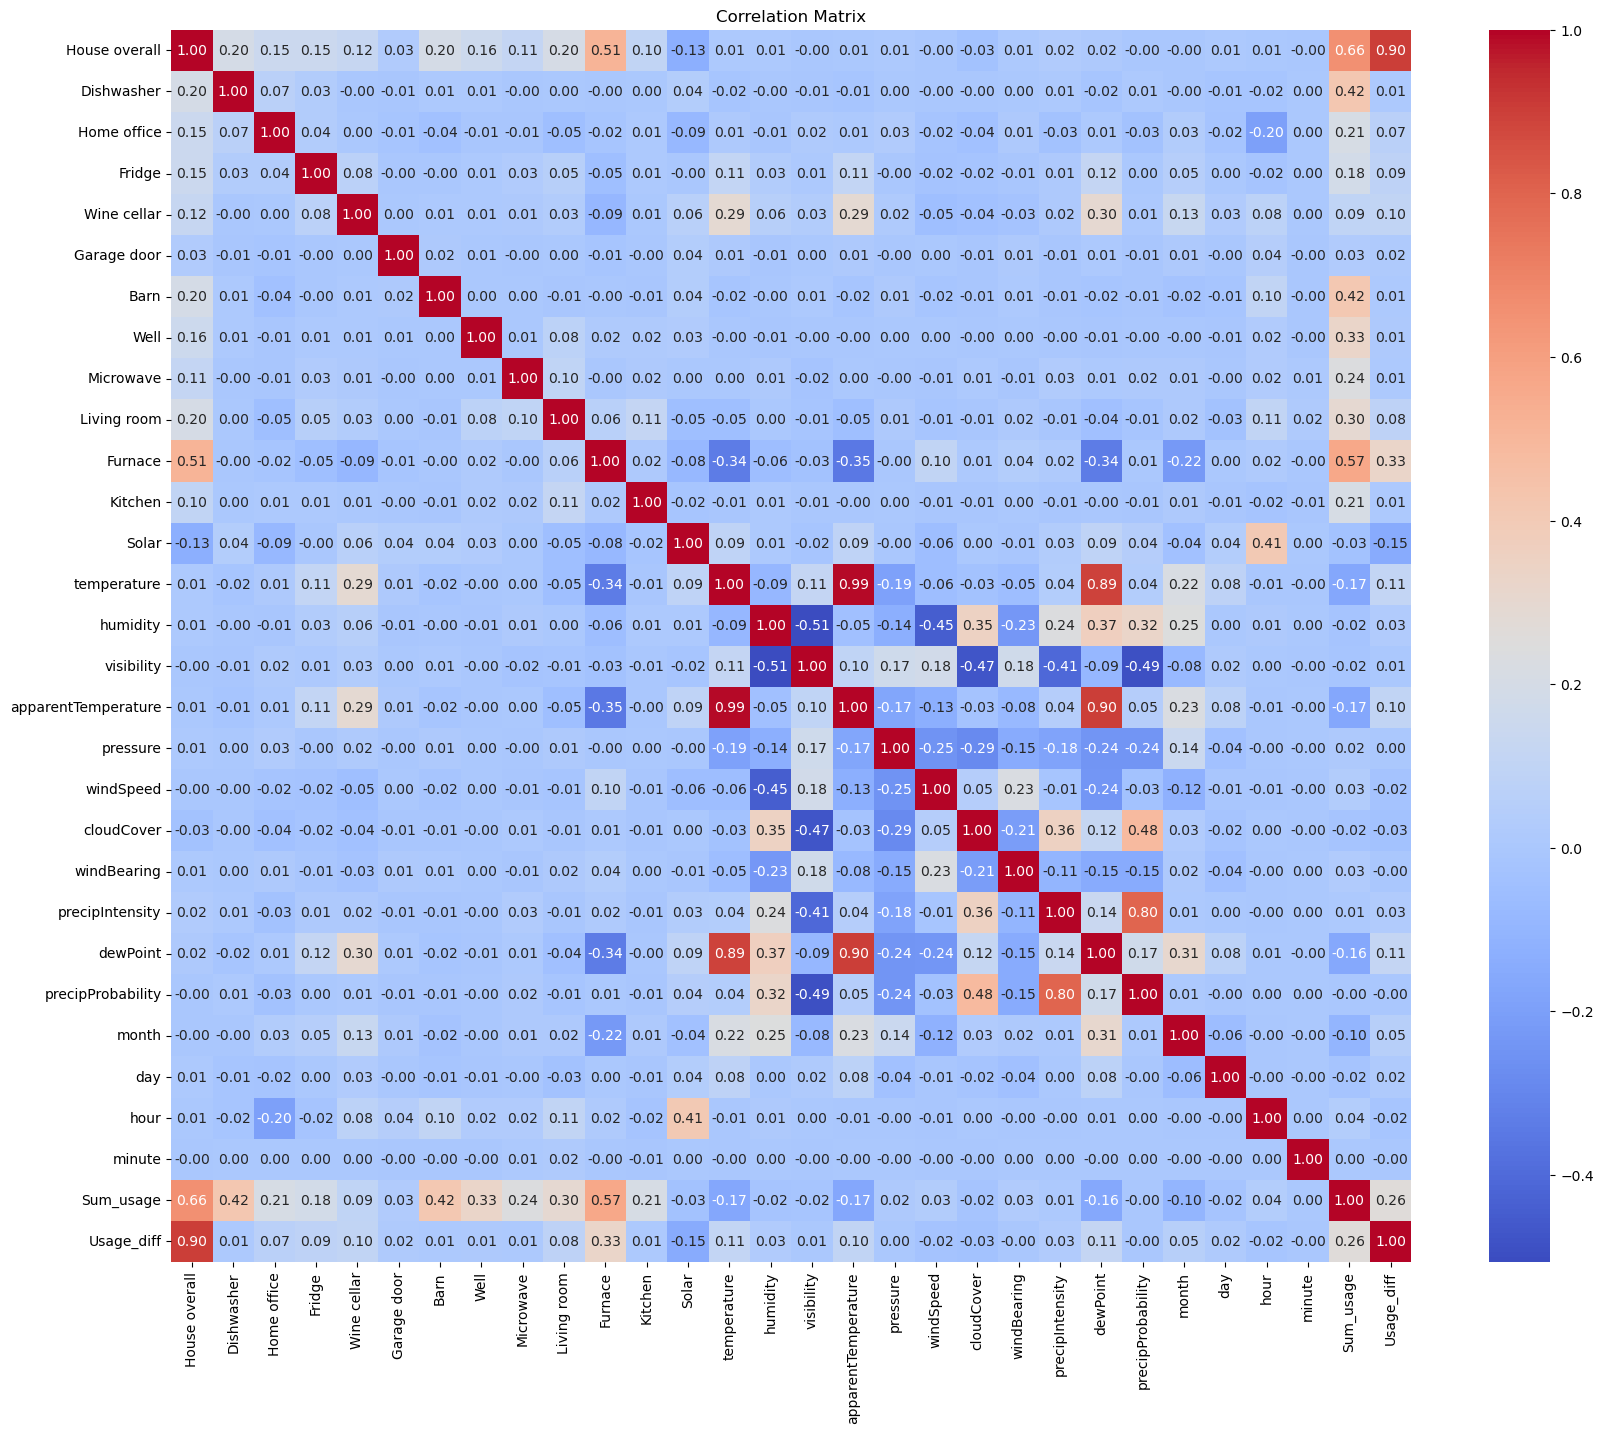

In [135]:
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [136]:
df = pd.read_csv("HomeC.csv")
df.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
0          0.006983          0.013083         0.000417         0.000150   
1          0.006983          0.013117         0.000417         0.000150   
2          0.006983          0.013083         0.000433         0.000167   
3          0.006983          0.013000         0.000433         0.000217   
4          0.006850          0.012783         0.000450         0.000333   

   Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
0         0.000000   0.031350   0.001017        0.004067          0.001517   
1         0.000000   0.031500   0.001017        0.004067          0.001650   
2         0.000017   0.031517   0.001000        0.004067          0.001650   
3         0.000000   0.031500   0.001017        0.004067          0.001617   
4         0.000000   0.031500   0.001017        0.004067          0.001583   

   Solar [kW]  temperature         icon  humidity  visibility summary  \
0    0.003483        36.14  clear-night      0.62        10.0   Clear   
1    0.003467        36.14  clear-night      0.62        10.0   Clear   
2    0.003467        36.14  clear-night      0.62        10.0   Clear   
3    0.003483        36.14  clear-night      0.62        10.0   Clear   
4    0.003467        36.14  clear-night      0.62        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   
2                29.26   1016.91       9.18  cloudCover        282.0   
3                29.26   1016.91       9.18  cloudCover        282.0   
4                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0

In [137]:
df.describe()

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
count     503910.000000     503910.000000    503910.000000    503910.000000   
mean           0.042137          0.014139         0.002755         0.007023   
std            0.057967          0.014292         0.021860         0.076740   
min            0.000017          0.000017         0.000000         0.000000   
25%            0.007133          0.012733         0.000500         0.000017   
50%            0.008083          0.012933         0.000667         0.000050   
75%            0.053192          0.013100         0.000750         0.000167   
max            1.273933          1.088983         1.166583         2.262583   

       Kitchen 38 [kW]      Barn [kW]      Well [kW]  Microwave [kW]  \
count    503910.000000  503910.000000  503910.000000   503910.000000   
mean          0.000009       0.058530       0.015642        0.010983   
std           0.000010       0.202706       0.137841        0.098859   
min           0.000000       0.000000       0.000000        0.000000   
25%           0.000000       0.029833       0.000983        0.003617   
50%           0.000017       0.031317       0.001000        0.004000   
75%           0.000017       0.032883       0.001017        0.004067   
max           0.000183       7.027900       1.633017        1.929800   

       Living room [kW]     Solar [kW]    temperature       humidity  \
count     503910.000000  503910.000000  503910.000000  503910.000000   
mean           0.035313       0.076229      50.741935       0.664085   
std            0.096056       0.128428      19.113807       0.194389   
min            0.000000       0.000000     -12.640000       0.130000   
25%            0.001483       0.003367      35.770000       0.510000   
50%            0.001617       0.004283      50.320000       0.680000   
75%            0.001750       0.083917      66.260000       0.840000   
max            0.465217       0.613883      93.720000       0.980000   

          visibility  apparentTemperature       pressure      windSpeed  \
count  503910.000000        503910.000000  503910.000000  503910.000000   
mean        9.253444            48.263382    1016.301625       6.649936   
std         1.611186            22.027916       7.895185       3.982716   
min         0.270000           -32.080000     986.400000       0.000000   
25%         9.420000            31.090000    1011.290000       3.660000   
50%        10.000000            50.320000    1016.530000       5.930000   
75%        10.000000            66.260000    1021.480000       8.940000   
max        10.000000           101.120000    1042.

In [138]:
df.head(2)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633      0.12415   
1        0.020717        0.063817          0.444067      0.12400   

   Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
0          0.006983          0.013083         0.000417          0.00015   
1          0.006983          0.013117         0.000417          0.00015   

   Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
0              0.0    0.03135   0.001017        0.004067          0.001517   
1              0.0    0.03150   0.001017        0.004067          0.001650   

   Solar [kW]  temperature         icon  humidity  visibility summary  \
0    0.003483        36.14  clear-night      0.62        10.0   Clear   
1    0.003467        36.14  clear-night      0.62        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0

In [139]:
print(df.describe())
data_numeric = df.select_dtypes(include=['float64', 'int64'])

            use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.0000

In [140]:
df.summary.value_counts()

Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: summary, dtype: int64

In [141]:
df.isna().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [142]:
# This function is used to remove missing values (NaN values) from the DataFrame.
df.dropna(inplace=True)


In [143]:
def change_class(x):
    if 'Clear' in x:
        return 0
    if 'Cloudy' in x:
        return 1
    if "Breezy" in x:
        return 1
    else:
        return 2

df['summary'] = df['summary'].map(lambda x: change_class(x))

df = df[['temperature', 'windSpeed', 'humidity', 'summary']]

df.summary.value_counts()

df.drop_duplicates(inplace=True)

In [144]:
df

temperature  windSpeed  humidity  summary
0             36.14       9.18      0.62        0
58            35.87       8.29      0.61        1
116           35.40       8.20      0.61        0
174           35.25       5.47      0.64        0
232           35.49       7.08      0.64        0
290           35.26       6.45      0.65        0
348           34.99       6.53      0.66        0
406           35.06       5.77      0.66        1
464           34.83       5.99      0.68        0
522           35.70       5.55      0.65        0
580           36.92       5.14      0.62        0
638           36.87       7.37      0.62        0
696           37.31       9.59      0.59        0
754           37.14       9.45      0.59        2
812           37.19       7.61      0.58        0
870           36.57       7.09      0.60        0
928           35.91       8.95      0.61        0
986           34.89       7.91      0.65        1
1044          33.87       7.58      0.68        1
1102          32.87       9.14      0.70        1
1160          32.17       7.89      0.68        0
1218          31.43       7.40      0.63        0
1276          30.98       7.06      0.61        1
1334          30.49       8.23      0.60        0
1392          30.04       8.02      0.60        0
1450          29.56       8.04      0.60        0
1508          28.84       8.04      0.62        0
1566          29.15       8.00      0.63        0
1624          29.55       7.22      0.63        1
1682          29.10       7.51      0.64        1
1740          28.92       6.47      0.64        1
1798          28.67       6.71      0.63        1
1856          28.65       7.86      0.62        0
1914          30.79       7.97      0.56        0
1972          32.13       9.37      0.53        0
2030          33.53      10.01      0.51        1
2088          35.11      10.35      0.48        0
2146          35.43      11.07      0.47        1
2204          35.86       9.92      0.47        0
2262          34.78      11.65      0.51        0
2320          34.26       8.02      0.53        1
2378          33.61       6.53      0.55        0
2436          33.30       6.18      0.57        0
2494          33.22       6.59      0.57        2
2552          33.03       6.30      0.58        0
2610          33.03       6.45      0.58        0
2668          32.64       6.17      0.59        0
2726          31.88       6.51      0.60        0
2784          31.53       6.22      0.61        0
2842          30.61       6.82      0.63        1
2900          29.77       7.07      0.64        0
2958          29.25       6.65      0.66        0
3016          28.79       6.66      0.66        0
3074          28.63       7.03      0.68        0
3132          27.57       6.80      0.72        0
3190          27.55       7.21      0.73        0
3248          28.32       7.09      0.73        0
3306          31.40       8.39      0.67        0
3364          34.78       9.11      0.60        0
3422          37.22       8.45      0.55        0
3480          38.05       9.55      0.53        0
3538          39.04      12.31      0.51        1
3596          39.55      11.30      0.51        1
3654          39.11      10.12      0.52        0
3712          38.37       8.35      0.54        0
3770          37.21       7.63      0.56        0
3828          35.89       6.52      0.59        0
3886          34.21       5.59      0.66        1
3944          34.44       6.55      0.65        0
4002          32.80       4.14      0.69        1
4060          31.64       5.40      0.72        0
4118          30.56       6.39      0.76        0
4176          28.88       5.83      0.80        0
4234          28.58       7.35      0.78        0
4292          28.69       8.27      0.76        1
4350          29.25      11.61      0.67        1
4408          28.22      12.73      0.63        0
4466          27.08      12.26      0.61        0
4524          24.96      11.99      0.61        0
4582    

In [145]:
df = pd.concat([df[df.summary == 0][:100], df[df.summary==1][:100], df[df.summary==2][:100]])

In [146]:
df

temperature  windSpeed  humidity  summary
0            36.14       9.18      0.62        0
116          35.40       8.20      0.61        0
174          35.25       5.47      0.64        0
232          35.49       7.08      0.64        0
290          35.26       6.45      0.65        0
348          34.99       6.53      0.66        0
464          34.83       5.99      0.68        0
522          35.70       5.55      0.65        0
580          36.92       5.14      0.62        0
638          36.87       7.37      0.62        0
696          37.31       9.59      0.59        0
812          37.19       7.61      0.58        0
870          36.57       7.09      0.60        0
928          35.91       8.95      0.61        0
1160         32.17       7.89      0.68        0
1218         31.43       7.40      0.63        0
1334         30.49       8.23      0.60        0
1392         30.04       8.02      0.60        0
1450         29.56       8.04      0.60        0
1508         28.84       8.04      0.62        0
1566         29.15       8.00      0.63        0
1856         28.65       7.86      0.62        0
1914         30.79       7.97      0.56        0
1972         32.13       9.37      0.53        0
2088         35.11      10.35      0.48        0
2204         35.86       9.92      0.47        0
2262         34.78      11.65      0.51        0
2378         33.61       6.53      0.55        0
2436         33.30       6.18      0.57        0
2552         33.03       6.30      0.58        0
2610         33.03       6.45      0.58        0
2668         32.64       6.17      0.59        0
2726         31.88       6.51      0.60        0
2784         31.53       6.22      0.61        0
2900         29.77       7.07      0.64        0
2958         29.25       6.65      0.66        0
3016         28.79       6.66      0.66        0
3074         28.63       7.03      0.68        0
3132         27.57       6.80      0.72        0
3190         27.55       7.21      0.73        0
3248         28.32       7.09      0.73        0
3306         31.40       8.39      0.67        0
3364         34.78       9.11      0.60        0
3422         37.22       8.45      0.55        0
3480         38.05       9.55      0.53        0
3654         39.11      10.12      0.52        0
3712         38.37       8.35      0.54        0
3770         37.21       7.63      0.56        0
3828         35.89       6.52      0.59        0
3944         34.44       6.55      0.65        0
4060         31.64       5.40      0.72        0
4118         30.56       6.39      0.76        0
4176         28.88       5.83      0.80        0
4234         28.58       7.35      0.78        0
4408         28.22      12.73      0.63        0
4466         27.08      12.26      0.61        0
4524         24.96      11.99      0.61        0
4640         22.09      12.12      0.62        0
4698         21.62      12.63      0.59        0
4756         21.06      11.78      0.57        0
4814         21.22      12.76      0.54        0
4872         21.60      12.70      0.51        0
4988         21.24      13.12      0.46        0
5046         20.10      13.36      0.45        0
5104         17.75      14.54      0.48        0
5162         15.12      13.63      0.51        0
5220         13.13      13.27      0.51        0
5278         11.71      12.40      0.52        0
5336         10.49      13.43      0.55        0
5394          9.39      13.79      0.56        0
5452          8.83      14.02      0.55        0
5510          7.70      11.94      0.57        0
5568          6.91      11.65      0.57        0
5626          6.64      10.64      0.57        0
5684          6.07       9.82      0.58        0
5742          5.77       7.75      0.59        0
5800          5.47       6.53      0.61        0
5858          5.35       6.98      0.62        0
5916          5.17       7.91      0.63        0
5974          4.91       6.97      0.65        0
6032          5.29       6.19      0.6

In [147]:
X = df.drop('summary', axis=1)
y = df.summary

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [148]:
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    def __init__(self, K: int = 3, metric: str = 'minkowski', p: int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
        K -> integer specifying number of neighbours to consider
        metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
        p -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)

        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)

        # store/initialise input parameters
        self.K = K
        self.metric = metric
        self.p = p
        self.X_train = np.array([])
        self.y_train = np.array([])

    def __del__(self) -> None:
        """
        Destructor function.
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train

    def __minkowski(self, x: np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
        x -> numpy data point of predictors to consider
        Outputs:
        np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)

    def __cosine(self, x: np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
        x -> numpy data point of predictors to consider
        Outputs:
        np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))) )

    def __distances(self, X: np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
        X -> numpy array of points [x]
        Outputs:
        D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)

        # return computed distances
        return D

    @abstractmethod
    def _generate_predictions(self, idx_neighbours: np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass

    def fit(self, X: np.array, y: np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
        X -> numpy array containing the predictor features
        y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)

    def predict(self, X: np.array) -> np.array:
        """
        Public prediction function for the class.
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
        X -> numpy array containing the predictor features
        Outputs:
        y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')

        # compute distances
        D = self.__distances(X)

        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]

        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)

        # return results
        return y_pred

    def get_params(self, deep: bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
        deep -> boolean input parameter
        Outputs:
        Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

#Generating kNN Classifier
class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    def __init__(self, K: int = 3, metric: str = 'minkowski', p: int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
        K -> integer specifying number of neighbours to consider
        metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
        p -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)

    def _generate_predictions(self, idx_neighbours: np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
        idx_neighbours -> indices of nearest neighbours
        Outputs:
        y_pred -> numpy array of prediction results
        """
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()

        # return result
        return y_pred

In [149]:
knn = KNNClassifier(K=3)
knn.fit(X, y)
y_pred = knn.predict(X)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2], d

In [150]:
accuracy = sum(y==y_pred)/len(y)
accuracy

0.7866666666666666

CLASSIFICATION REPORT

In [151]:
from sklearn.metrics import classification_report


classification_report(y, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.76      0.86      0.81       100\n           1       0.82      0.68      0.74       100\n           2       0.79      0.82      0.80       100\n\n    accuracy                           0.79       300\n   macro avg       0.79      0.79      0.78       300\nweighted avg       0.79      0.79      0.78       300\n'

NOW DECISION TREE CLASSIFIER!

In [152]:
import warnings

warnings.filterwarnings('ignore')

In [153]:
# view dimensions of dataset

df.shape

(300, 4)

In [154]:
# preview the dataset

df.head()

temperature  windSpeed  humidity  summary
0          36.14       9.18      0.62        0
116        35.40       8.20      0.61        0
174        35.25       5.47      0.64        0
232        35.49       7.08      0.64        0
290        35.26       6.45      0.65        0

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 63916
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  300 non-null    float64
 1   windSpeed    300 non-null    float64
 2   humidity     300 non-null    float64
 3   summary      300 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.7 KB


In [156]:
    print(df.value_counts())   

temperature  windSpeed  humidity  summary
4.91         6.97       0.65      0          1
34.88        5.14       0.77      1          1
34.78        11.65      0.51      0          1
             9.11       0.60      0          1
34.77        5.74       0.91      2          1
34.76        4.48       0.80      2          1
34.69        2.84       0.84      1          1
34.65        7.41       0.84      1          1
             4.07       0.81      1          1
34.61        7.71       0.91      2          1
34.60        3.18       0.84      1          1
34.59        6.54       0.90      2          1
34.58        6.01       0.91      2          1
34.44        6.55       0.65      0          1
34.26        8.02       0.53      1          1
             7.62       0.91      2          1
34.21        5.59       0.66      1          1
34.83        5.99       0.68      0          1
34.89        7.91       0.65      1          1
33.61        6.53       0.55      0          1
34.91        3.52 

In [157]:
df['summary'].value_counts()

0    100
1    100
2    100
Name: summary, dtype: int64

In [158]:
df.isnull().sum()

temperature    0
windSpeed      0
humidity       0
summary        0
dtype: int64

In [159]:
X = df.drop(['summary'], axis=1)

y = df['summary']

In [160]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [161]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((201, 3), (99, 3))

In [162]:
# check data types in X_train

X_train.dtypes

temperature    float64
windSpeed      float64
humidity       float64
dtype: object

In [163]:
X_train.head()

temperature  windSpeed  humidity
5278         11.71      12.40      0.52
21286        34.58       6.01      0.91
5394          9.39      13.79      0.56
2668         32.64       6.17      0.59
31378        26.27      15.93      0.58

In [164]:
# import category encoders

import category_encoders as ce

In [165]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['temperature', 'windSpeed', 'humidity', ])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [166]:
X_train.head()

temperature  windSpeed  humidity
5278             1          1         1
21286            2          2         2
5394             3          3         3
2668             4          4         4
31378            5          5         5

In [167]:
X_test.head()

temperature  windSpeed  humidity
11890         -1.0       -1.0      36.0
53650         -1.0       -1.0      14.0
19198         -1.0       -1.0      50.0
638           -1.0       -1.0      44.0
21634         -1.0       -1.0      13.0

In [168]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [169]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [170]:
y_pred_gini = clf_gini.predict(X_test)

In [171]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4040


In [172]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0], dtype=int64)

In [173]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.4975


In [174]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.4975
Test set score: 0.4040


[Text(0.4090909090909091, 0.875, 'x[2] <= 2.5\ngini = 0.666\nsamples = 201\nvalue = [62, 68, 71]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [1, 0, 8]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(0.6363636363636364, 0.625, 'x[0] <= 46.5\ngini = 0.666\nsamples = 192\nvalue = [61, 68, 63]'),
 Text(0.45454545454545453, 0.375, 'x[2] <= 13.5\ngini = 0.585\nsamples = 46\nvalue = [9, 26, 11]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.665\nsamples = 19\nvalue = [6, 6, 7]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.417\nsamples = 27\nvalue = [3, 20, 4]'),
 Text(0.8181818181818182, 0.375, 'x[2] <= 37.5\ngini = 0.664\nsamples = 146\nvalue = [52, 42, 52]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.656\nsamples = 111\nvalue = [34, 31, 46]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.607\nsamples = 35\nvalue = [18, 11, 6]')]

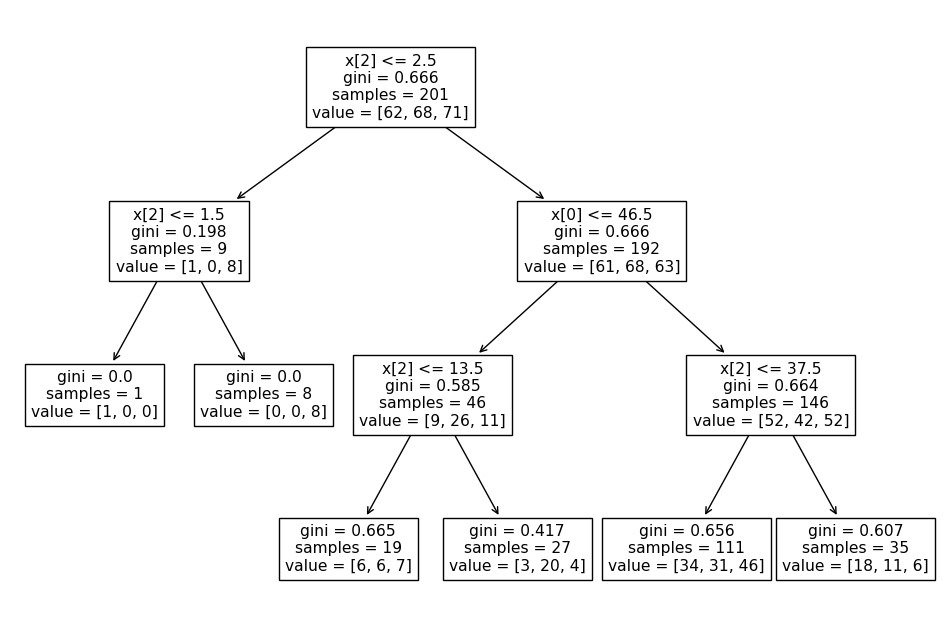

In [175]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

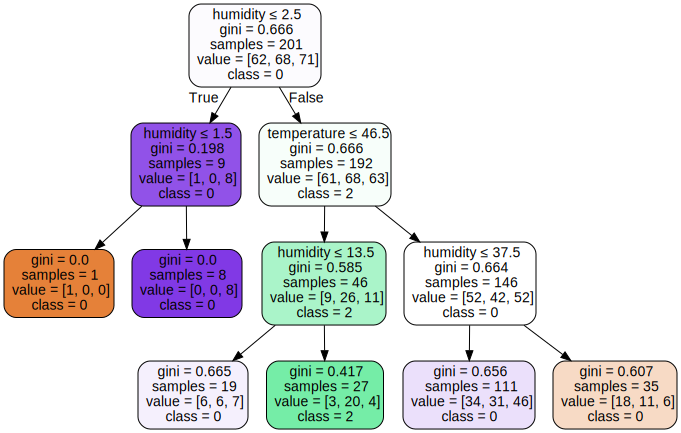

In [176]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.astype(str),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph


In [177]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [178]:
y_pred_en = clf_en.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.3838


In [180]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0], dtype=int64)

In [181]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.4925


In [182]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.4925
Test set score: 0.3838


[Text(0.4090909090909091, 0.875, 'x[2] <= 2.5\nentropy = 1.583\nsamples = 201\nvalue = [62, 68, 71]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 1.5\nentropy = 0.503\nsamples = 9\nvalue = [1, 0, 8]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(0.6363636363636364, 0.625, 'x[1] <= 47.5\nentropy = 1.583\nsamples = 192\nvalue = [61, 68, 63]'),
 Text(0.45454545454545453, 0.375, 'x[1] <= 4.5\nentropy = 1.42\nsamples = 47\nvalue = [8, 26, 13]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 1.362\nsamples = 45\nvalue = [6, 26, 13]'),
 Text(0.8181818181818182, 0.375, 'x[2] <= 37.5\nentropy = 1.578\nsamples = 145\nvalue = [53, 42, 50]'),
 Text(0.7272727272727273, 0.125, 'entropy = 1.569\nsamples = 110\nvalue = [35, 31, 44]'),
 Text(0.9090909090909091, 0.125, 'entropy = 1.454\nsamples =

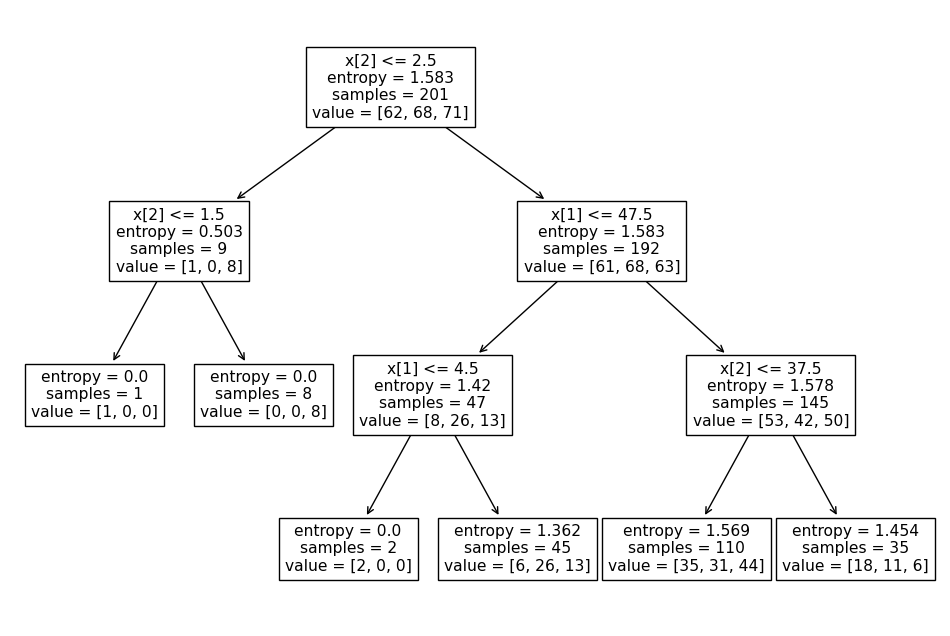

In [183]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

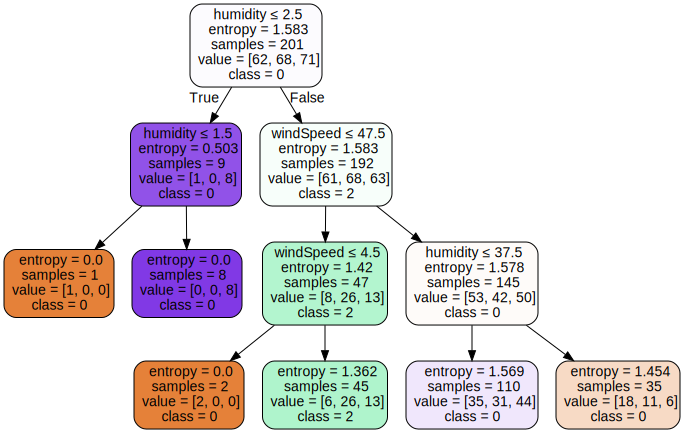

In [184]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model with training data
clf_en.fit(X_train, y_train)

import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.astype(str),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [185]:
# Define y_pred_en before using it in the confusion matrix

y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[33  2  3]
 [23  1  8]
 [24  1  4]]


In [186]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.41      0.87      0.56        38
           1       0.25      0.03      0.06        32
           2       0.27      0.14      0.18        29

    accuracy                           0.38        99
   macro avg       0.31      0.35      0.27        99
weighted avg       0.32      0.38      0.29        99

